---
Finding AD biomarkers in proteomics data
---
<div style='visibility:hidden' id='notebook-meta' data-filetype='.csv' data-notebook='.ipynb'></div>


Feyn version: 3.0.1+



Can the QLattice deal with omics data that is noisy and contains thousands of features? It certainly can!

Omics data typically contains hundreds to thousands of features (proteins, transcripts, methylated DNA etc.) that are measured in samples derived from sources such as blood, tissue or cell culture. These types of approaches are often used for exploratory analysis e.g. in **biomarker discovery** or understanding the **mechanism of action** of a certain drug. It often resembles a bit of a "fishing exercise".

Thus, there is a need to quickly and reliably identify the most important **features** and their **interactions** that contribute to a certain signal (e.g. disease state, cell-type identity, cancer detection).

In this tutorial we present a brief workflow for building simple and interpretable models for proteomics data. This specific example is taken from a study by [Bader & Geyer et al. 2020](https://www.embopress.org/doi/full/10.15252/msb.20199356) (Mann group) and contains samples taken from the cerebrospinal fluid of Alzheimer Disease (AD) patients and non-AD patients. We will show you how to build `QLattice` model that can classify people into AD and non-AD according to their proteomic profiles.

The dataset contains over a thousand features (features in this example describe the intensity of different proteins measured by mass spectrometry).

In [1]:
import numpy as np
import pandas as pd
import feyn

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/privacy`.


## Load the data
Note, the data has been preprocessed and missing values have been imputed.
It contains **1166 proteins** and **88 non-AD** and **49 AD** subjects.

In [2]:
data = pd.read_csv("../data/ad_omics.csv")

# Let's record the categorical data types in our dataset (note features will be treated as numerical by default).
stypes = {}
for f in data.columns:
    if data[f].dtype =='object':
        stypes[f] = 'c'

## Split dataset into train and test set

In [3]:
# Set random seed for reproducibility
random_seed = 42

# Define the target variable
target = "_clinical AD diagnosis"

# Split
train, test = train_test_split(data, test_size=0.33, stratify=data[target], random_state=random_seed)

## Train the QLattice

### Sample and fit models

This occurs in the following steps:

1. Sample models from the QLattice;
2. Fit the models by minimizing [BIC (Bayesian Information Criterion)](https://en.wikipedia.org/wiki/Bayesian_information_criterion);
3. Update the QLattice with the best models' structures;
4. Repeat the process;

This is all captured within the `auto_run` function

In [14]:
# Connecting 
ql = feyn.QLattice(random_seed)

# Sample and fit models
models = ql.auto_run(
    data=train,
    output_name=target,
    kind='classification',
    stypes=stypes,
    n_epochs=30
    )

## Inspect the top model

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 621 216.0" width="621" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="351" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>_clinical AD diagnosis
logistic:
w=3.3993
bias=0.3652</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">_clinica..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">out</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">1</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>NID2
linear:
scale=0.000013
scale offset=141003.958448
w=-1.214495
bias=-0.4323</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">NID2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>MAPT
linear:
scale=0.000038
scale offset=24475.827038
w=3.065043
bias=0.0670</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">MAPT</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="351" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.923</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.968</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">0.933</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">0.848</text></svg><svg class="summary" height="79" width="90" x="531" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" 
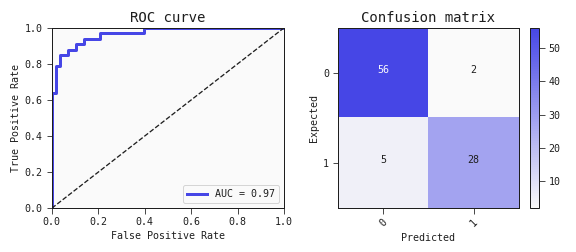
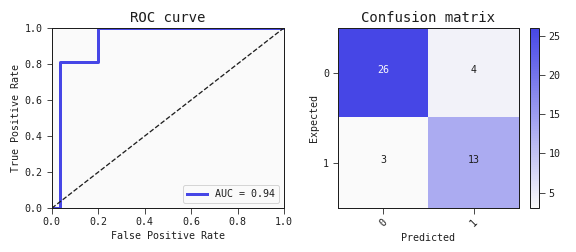

In [15]:
best = models[0]
best.plot(train, test, filename)

With the plot below, we inspect the *Pearson correlation* between the values at each node and the true output:

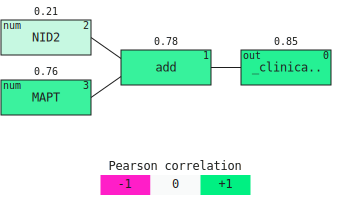

In [20]:
best.plot_signal(train)

As expected, `MAPT` (i.e. Tau) seems to be driving most of the signal here. Let's investigate further.

## Explore features

Let's look at how the different features play together.

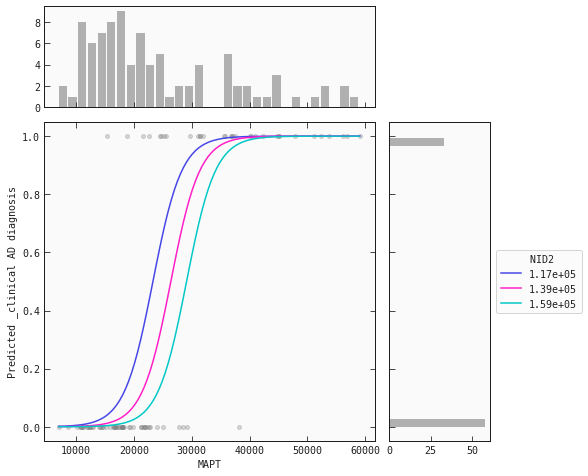

In [17]:
show_quantiles = 'NID2'
fixed = {}
fixed[show_quantiles] = [
    train[show_quantiles].quantile(q=0.25),
    train[show_quantiles].quantile(q=0.5),
    train[show_quantiles].quantile(q=0.75)
]

best.plot_response_1d(train, by = "MAPT", input_constraints=fixed, filename=)

This response plot shows you how higher `NID2` levels shift the `MAPT` curve to the left. I.e. the higher your `NID2` levels, the lower your `MAPT` levels have to be for a positive AD prediction.